In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def flip(row):
    return abs(row-1)

chest


,Category,Num
0,pleural_effusion,683.0
1,nodule,328.0
2,pneumonia,466.0
3,cardiomegaly,516.0
4,hilar_enlargement,387.0
5,fracture_old,252.0
6,fibrosis,309.0
7,aortic_calcification,276.0
8,tortuous_aorta,286.0
9,thickened_pleura,269.0


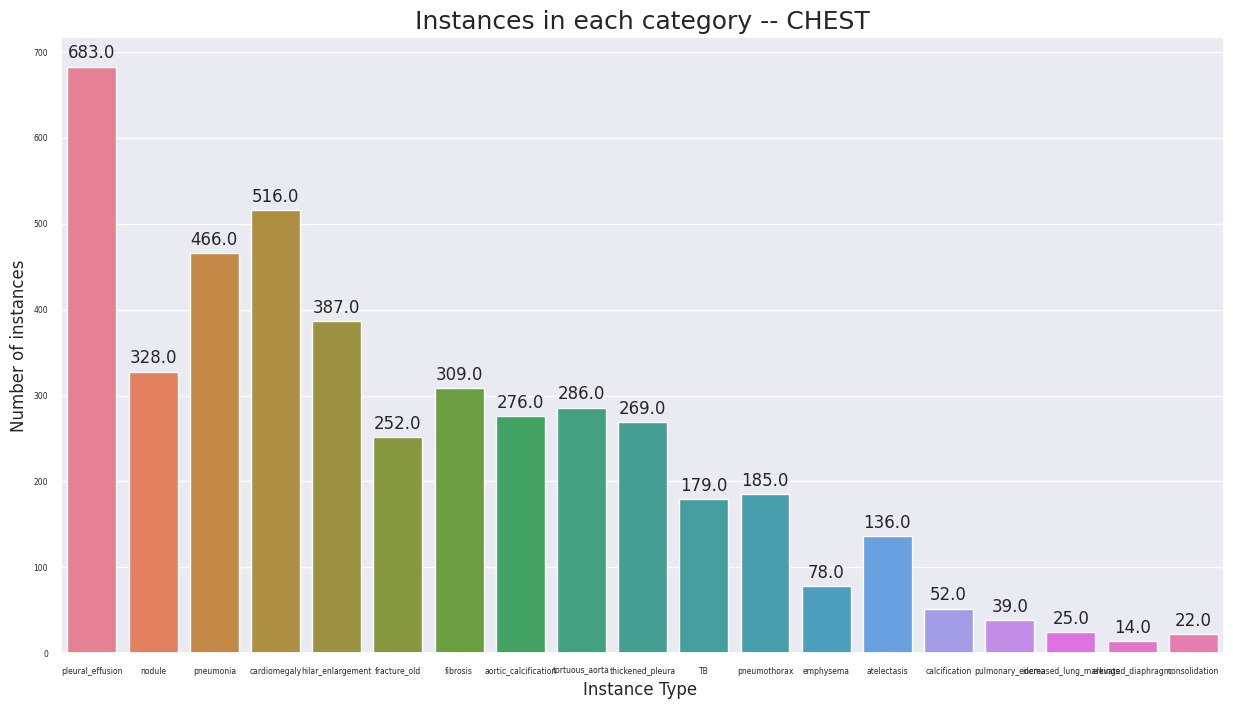

,Category,Num
0,2.0,468
1,1.0,429
2,0.0,423
3,3.0,399
4,4.0,246
5,5.0,119
6,6.0,37
7,7.0,15
8,8.0,3
9,10.0,1


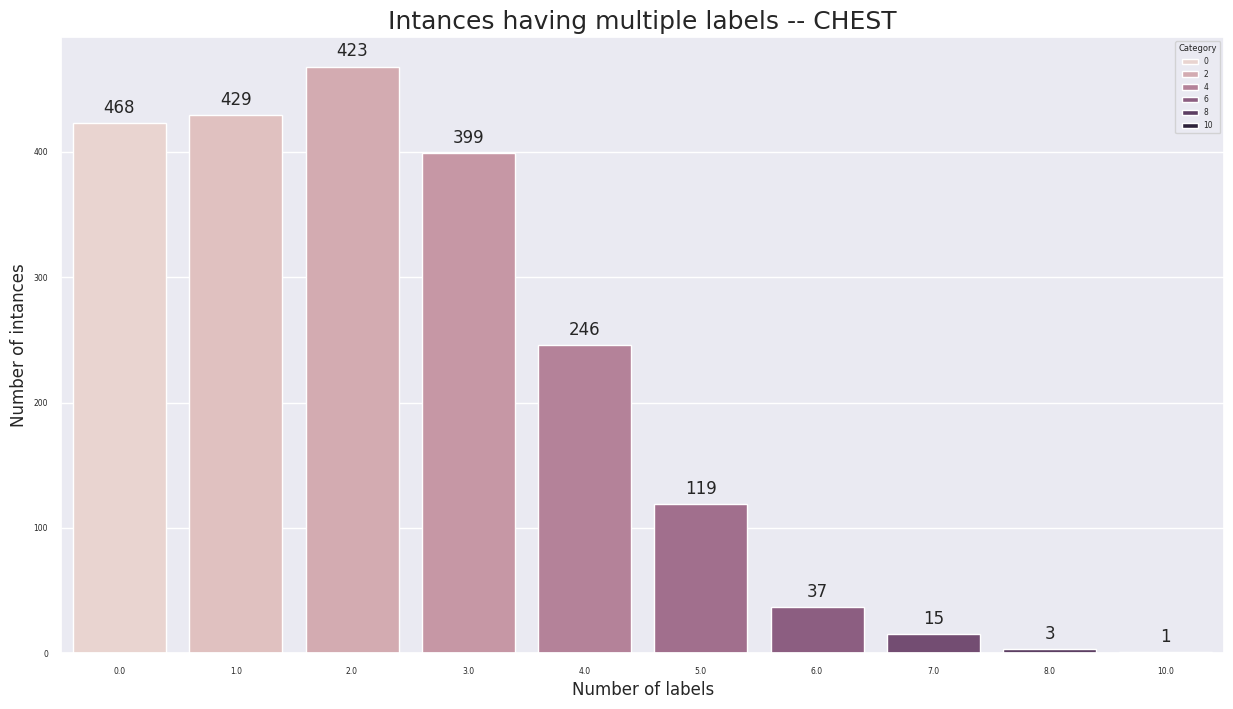

colon


,Category,Num
0,tumor,1887
1,not_tumor,3767


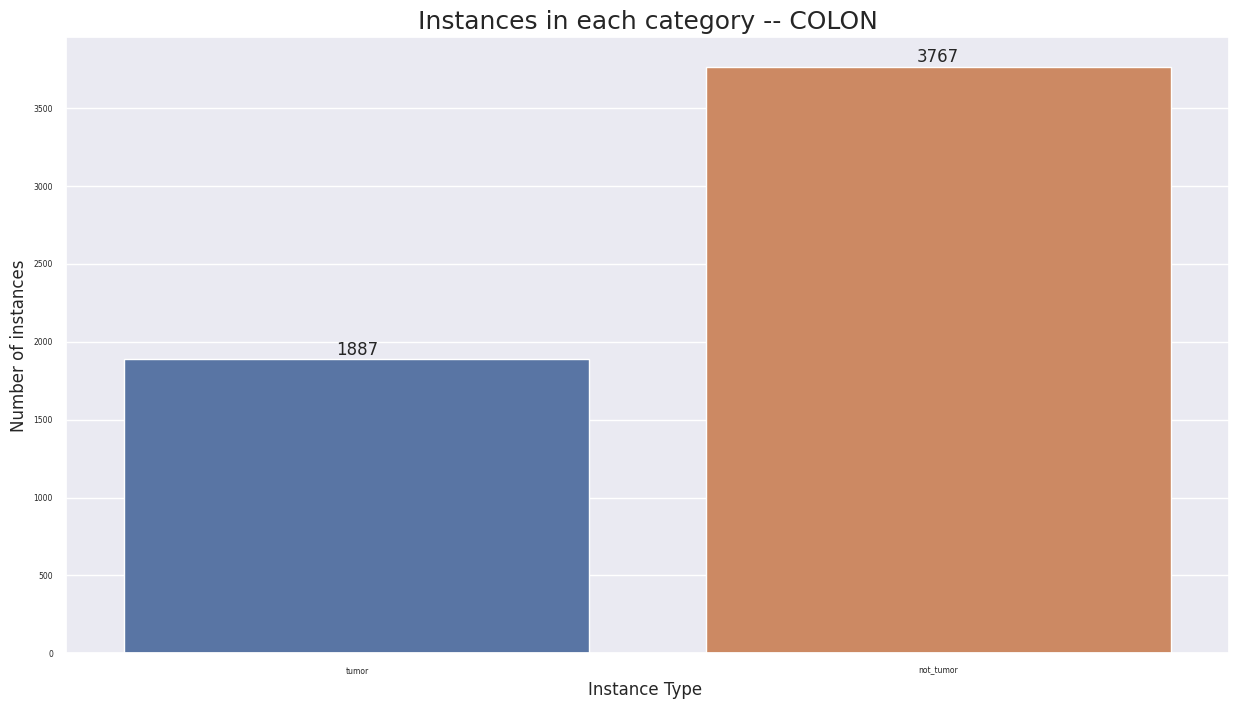

,Category,Num
0,1,5654


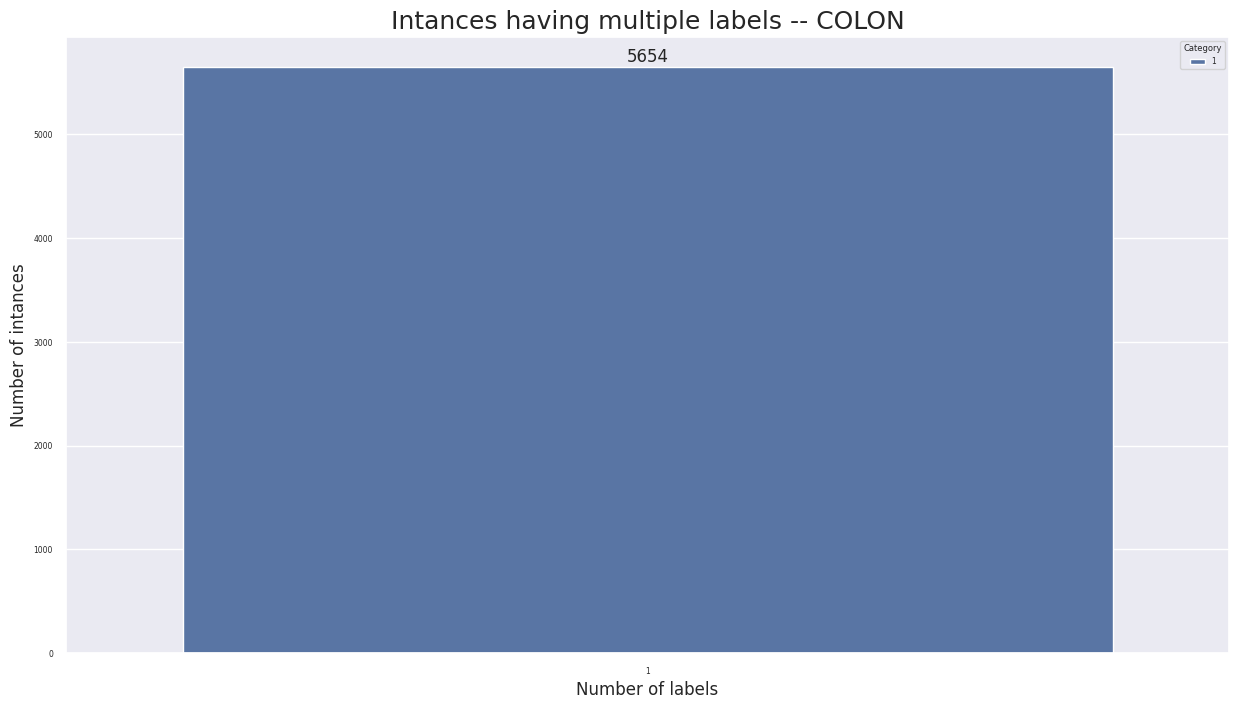

endo


,Category,Num
0,ulcer,416.0
1,erosion,472.0
2,polyp,222.0
3,tumor,108.0


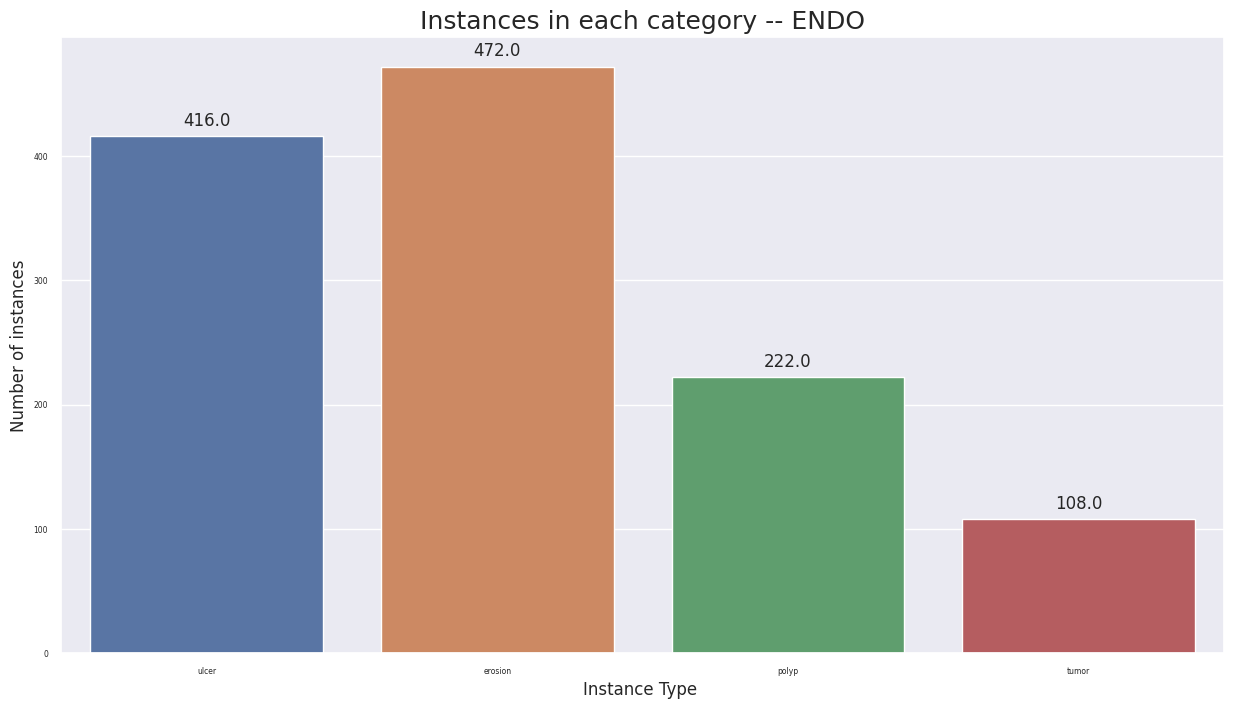

,Category,Num
0,0.0,882
1,1.0,667
2,2.0,233
3,3.0,27
4,4.0,1


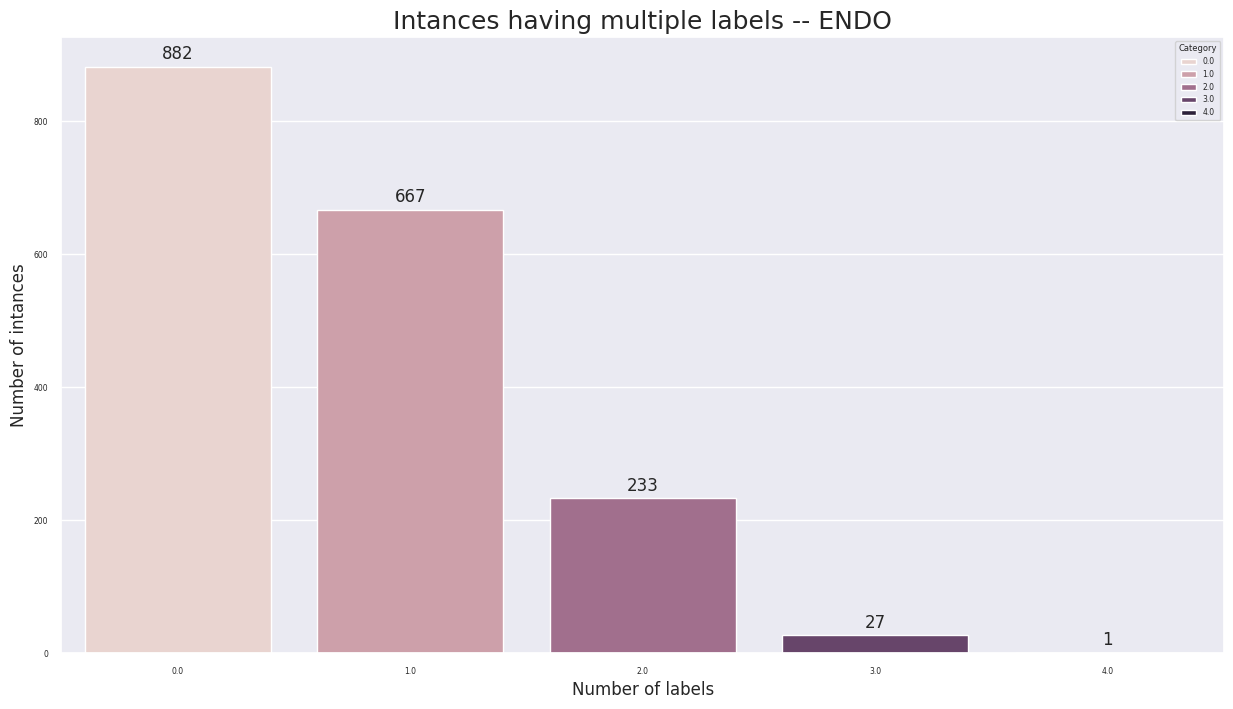

In [13]:
for task in ['chest', 'colon', 'endo']:
    print(task)
    
    data_raw = pd.read_csv(f"{task}_train.csv")
    
    for col in ['img_id', 'Unnamed: 0', 'slide_id', 'study_id']:
        if col in data_raw.columns:
            data_raw.drop(columns=[col], inplace=True)
    
    if len(data_raw.columns) == 1:
        data_raw['not_' + data_raw.columns.values[0]] = data_raw[data_raw.columns.values[0]].apply(flip)
    
    categories = list(data_raw.columns.values)
    
    sns.set(font_scale=0.5)
    
    plt.figure(figsize=(15,8))
    
    df_tmp = pd.DataFrame({'Category': categories, 'Num': data_raw.sum().values})
    
    display(df_tmp)
    
    ax = sns.barplot(data=df_tmp, x='Category', y='Num', hue="Category")
    
    plt.title(f"Instances in each category -- {task.upper()}", fontsize=18)
    plt.ylabel('Number of instances', fontsize=12)
    plt.xlabel('Instance Type ', fontsize=12)
    
    #adding the text labels
    rects = ax.patches
    labels = data_raw.sum().values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)
    plt.savefig(f"Instances in each category -- {task.upper()}.png")
    plt.show()
    
    ##############################################################################################################
    
    rowSums = data_raw.sum(axis=1)
    # display(rowSums)
    
    multiLabel_counts = rowSums.value_counts()
    # display(multiLabel_counts)
    
    # multiLabel_counts = multiLabel_counts.iloc[1:]
    
    sns.set(font_scale = 0.5)
    
    plt.figure(figsize=(15,8))
    
    df_tmp = pd.DataFrame({'Category': multiLabel_counts.index, 'Num': multiLabel_counts.values})
    
    display(df_tmp)
    
    ax = sns.barplot(df_tmp, x='Category', y='Num', hue="Category")
    plt.title(f"Intances having multiple labels -- {task.upper()}", fontsize=18)
    plt.ylabel('Number of intances', fontsize=12)
    plt.xlabel('Number of labels', fontsize=12)
    
    #adding the text labels
    rects = ax.patches
    labels = multiLabel_counts.values
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)
    plt.savefig(f"Intances having multiple labels -- {task.upper()}.png")
    plt.show()